In [16]:
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_files = font_manager.findSystemFonts(fontpaths='/content/drive/MyDrive/Pal-ette/D2Coding')
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rc('font', family='D2Coding')

In [ ]:
import tensorflow as tf
import os
from scipy.special import softmax
from PIL import Image
import numpy as np


In [ ]:
test_data = '/content/drive/MyDrive/CV_project/data/안구질환/개_train_test_val_squared/test'

In [ ]:
model_path = '/content/drive/MyDrive/CV_project/안구질환_모델/Resnet_squared_all_checkpoint.tf'
model = tf.keras.models.load_model(model_path)

In [49]:
# 라벨 한국어 번역
labels = ['결막염',
          '궤양성 각막질환',
          '백내장',
          '비궤양성 각막질환',
          '색소 침착성 각막염',
          '안검내반증',
          '안검염',
          '안검 종양',
          '유루증',
          '정상',
          '핵경화']

In [ ]:
def inference(file_path):
    img = Image.open(file_path)
    img = img.resize((224, 224))
    img = np.array(img)
    # print(img.shape)

    # img[:,:,0] = ((img[:,:,0] / 255) - 0.485) / 0.229
    # img[:,:,1] = ((img[:,:,1] / 255) - 0.456) / 0.224
    # img[:,:,2] = ((img[:,:,2] / 255) - 0.406) / 0.225
    # img = img.transpose((2,0,1))

    img = img / 255.
    img = tf.expand_dims(img, axis=0)
    pred = model.predict(img, verbose=0)
    return pred

In [24]:
predictions = {'target':[], 'pred':[], 'prob':[]}
for folder in os.listdir(test_data):
    print(folder)
    for file in os.listdir(os.path.join(test_data, folder)):
        pred = inference(os.path.join(test_data, folder, file))
        predictions['target'].append(folder)
        predictions['pred'].append(labels[pred.argmax()])
        predictions['prob'].append(pred.tolist())
        if len(predictions['target']) % 1000 == 0:
            print(len(predictions['target']), "predictions done")

안검내반증
정상
1000 predictions done
2000 predictions done
3000 predictions done
4000 predictions done
5000 predictions done
6000 predictions done
7000 predictions done
8000 predictions done
9000 predictions done
핵경화
안검종양
백내장
비궤양성각막질환
궤양성각막질환
색소침착성각막염
결막염
10000 predictions done
안검염
유루증


In [ ]:
from collections import Counter

Counter(predictions['target'])

Counter({'안검내반증': 675,
         '정상': 8515,
         '핵경화': 72,
         '안검종양': 11,
         '백내장': 107,
         '비궤양성각막질환': 77,
         '궤양성각막질환': 415,
         '색소침착성각막염': 45,
         '결막염': 111,
         '안검염': 129,
         '유루증': 841})

In [ ]:
Counter(predictions['pred'])

Counter({'안검내반증': 581,
         '유루증': 868,
         '안검염': 120,
         '정상': 8591,
         '결막염': 86,
         '궤양성각막질환': 422,
         '핵경화': 86,
         '백내장': 113,
         '안검종양': 6,
         '비궤양성각막질환': 73,
         '색소침착성각막염': 52})

In [43]:
import unicodedata
target = [unicodedata.normalize('NFC', t) for t in predictions['target']]
predictions['target'] = target

In [44]:
pred = [unicodedata.normalize('NFC', p) for p in predictions['pred']]
predictions['pred'] = pred

In [45]:
print(target[0], len(target[0]))

안검내반증 5


In [ ]:
!sudo apt-get install -y fonts-nanum

In [30]:
!rm -rf ~/.cache/matplotlib


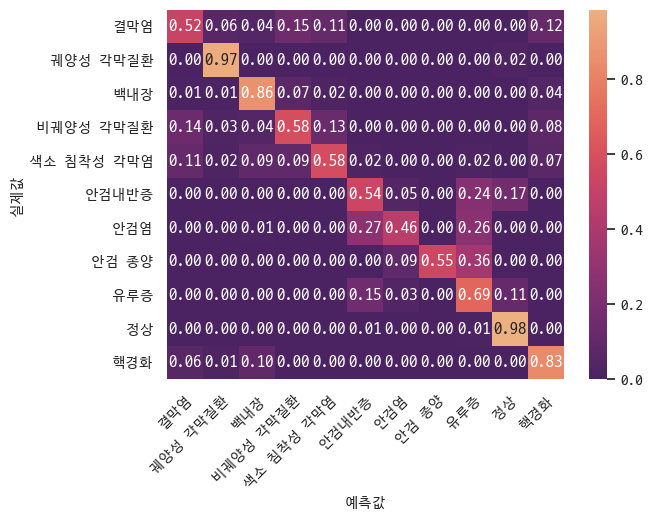

In [50]:
# confusion matrix 생성 및 시각화
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# confusion matrix 생성 및 시각화
cm = confusion_matrix(predictions['target'], predictions['pred'], normalize='true')
hm = sns.heatmap(cm, annot=True, fmt='.2f', cmap='flare_r')
hm.set_xlabel('예측값', fontsize=10)
hm.set_ylabel('실제값', fontsize=10)
hm.set_xticklabels(labels=labels, fontsize=10, rotation=45, ha='right', rotation_mode='anchor')
hm.set_yticklabels(labels=labels, fontsize=10, rotation=0)

plt.show()

[Text(0, 0.5, '결막염'),
 Text(0, 1.5, '궤양성각막질환'),
 Text(0, 2.5, '백내장'),
 Text(0, 3.5, '비궤양성각막질환'),
 Text(0, 4.5, '색소침착성각막염'),
 Text(0, 5.5, '안검내반증'),
 Text(0, 6.5, '안검염'),
 Text(0, 7.5, '안검종양'),
 Text(0, 8.5, '유루증'),
 Text(0, 9.5, '정상'),
 Text(0, 10.5, '핵경화')]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4455 (\N{HANGUL JUNGSEONG YEO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4527 (\N{HANGUL JONGSEONG RIEUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4358 (\N{HANGUL CHOSEONG MIEUM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 4520 (\N{HANGUL JONGSEONG KIYEOK}) missing from current font.
  fu

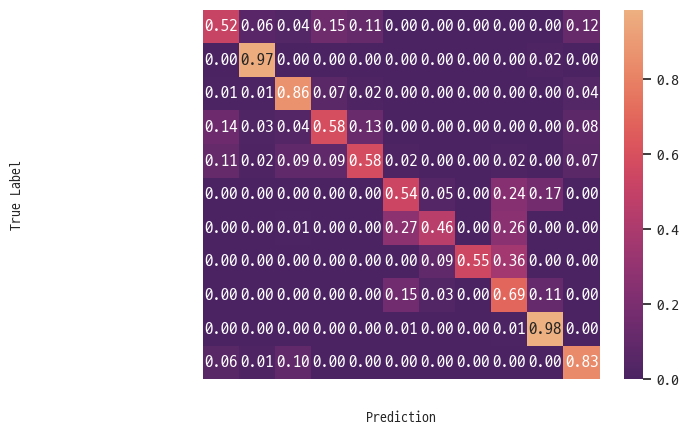

In [38]:
sns.heatmap(glue, annot=True)

In [ ]:
from sklearn.metrics import classification_report

cr = classification_report(predictions['target'], predictions['pred'])
print(cr)

              precision    recall  f1-score   support

         결막염       0.67      0.52      0.59       111
     궤양성각막질환       0.95      0.97      0.96       415
         백내장       0.81      0.86      0.84       107
    비궤양성각막질환       0.62      0.58      0.60        77
    색소침착성각막염       0.50      0.58      0.54        45
       안검내반증       0.63      0.54      0.58       675
         안검염       0.49      0.46      0.47       129
        안검종양       1.00      0.55      0.71        11
         유루증       0.67      0.69      0.68       841
          정상       0.97      0.98      0.98      8515
         핵경화       0.70      0.83      0.76        72

    accuracy                           0.92     10998
   macro avg       0.73      0.69      0.70     10998
weighted avg       0.91      0.92      0.91     10998

